In [211]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import tensorflow_io as tfio
import glob
import pandas as pd
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
from scipy.io import wavfile
from playsound import playsound
import librosa
import resampy
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
path=[]
image_dir=r"C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Algorithm_for_Image_Processing\Heart Beat\wave"
for i in os.listdir(image_dir):
    path.append(os.path.join(image_dir,i))

In [198]:
labels=[x.split("\\")[-1] for x in path]
Category=[x.split("_")[0] for x in labels]

In [5]:
df=pd.DataFrame()
df['path']=path
df['Labels']=Category

In [199]:
df.head()

,path,Labels
0,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,artifact
1,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,artifact
2,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,artifact
3,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,artifact
4,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,artifact


In [7]:
len(df)

832

In [8]:
df.isna().sum()

path      0
Labels    0
dtype: int64

In [205]:
df['Labels'].unique()

array(['artifact', 'Aunlabelledtest', 'Bunlabelledtest', 'extrahls',
       'extrastole', 'murmur', 'normal'], dtype=object)

In [203]:
df.groupby(df['Labels']).count()

,path
Labels,
Aunlabelledtest,52
Bunlabelledtest,195
artifact,40
extrahls,19
extrastole,46
murmur,129
normal,351


In [63]:
train_df=df[(df['Labels']!='Bunlabelledtest')&(df['Labels']!='Aunlabelledtest')]

In [64]:
train_df=train_df.sample(frac=1).reset_index(drop=True)

In [217]:
test_df=df[(df.Labels=='Bunlabelledtest')|(df.Labels=='Aunlabelledtest')]

In [65]:
len(train_df)

585

In [13]:
train_df['path'][0]

'C:\\Users\\ritaj\\OneDrive\\Desktop\\3rd Semster\\Algorithm_for_Image_Processing\\Heart Beat\\wave\\normal__125_1306332456645_B.wav'

In [14]:
train_df.convert_dtypes(infer_objects=True)

,path,Labels
0,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,normal
1,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,extrahls
2,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,normal
3,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,murmur
4,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,normal
...,...,...
580,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,normal
581,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,normal
582,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,normal
583,C:\Users\ritaj\OneDrive\Desktop\3rd Semster\Al...,artifact


#.Let Us Read wave file stored in file path

1.Let us Hear  the sound stored in the directory

In [212]:
def snd(path):
   return playsound(path)


In [213]:
snd(train_df['path'][100])

In [66]:
normal=train_df[train_df.Labels=='normal']['path']
murmur=train_df[train_df.Labels=='murmur']['path']
artifact=train_df[train_df.Labels=='artifact']['path']
extrahls=train_df[train_df.Labels=='extrahls']['path']
extrastole=train_df[train_df.Labels=='extrastole']['path']


In [67]:
len(normal)

351

Text(0.5, 1.0, 'Normal')

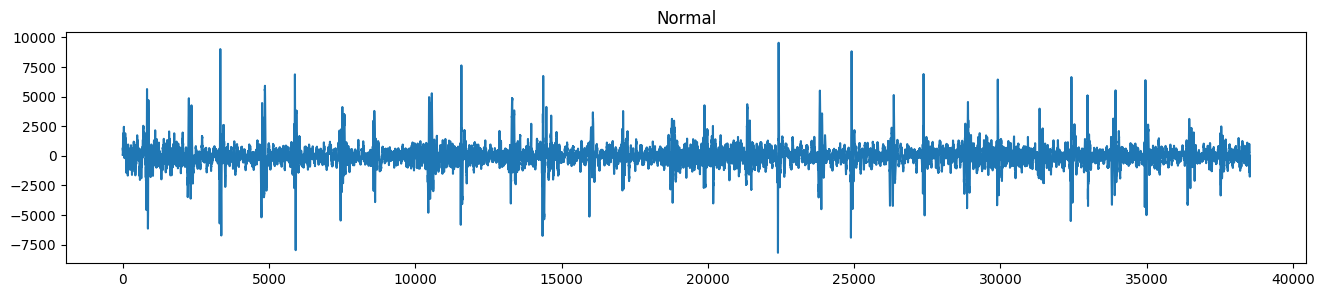

In [83]:
for path in normal:
    try:
        rate,signal=wavfile.read(path)
    except:
        pass
plt.figure(figsize=(16, 3))
plt.plot(signal, '-', );
plt.title("Normal")
   


Text(0.5, 1.0, 'Murmur')

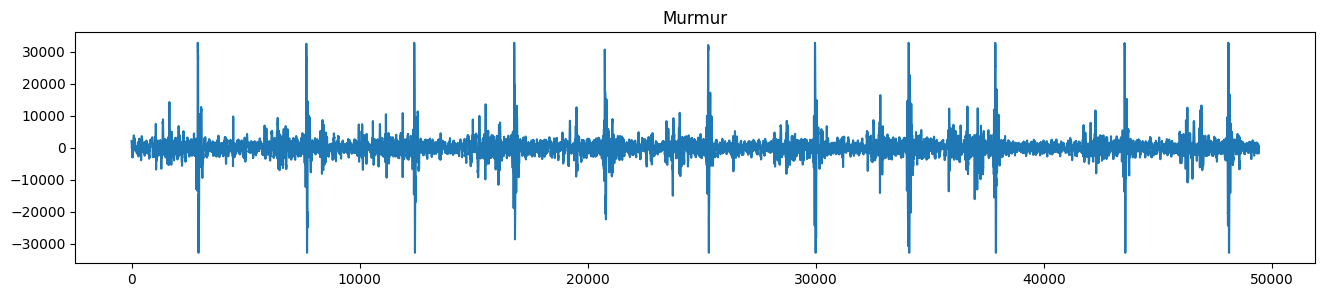

In [21]:
for path in murmur:
    try:
        rate,signal=wavfile.read(path)
    except:
        pass
plt.figure(figsize=(16, 3))
plt.plot(signal, '-', );
plt.title("Murmur")

Text(0.5, 1.0, 'artifact')

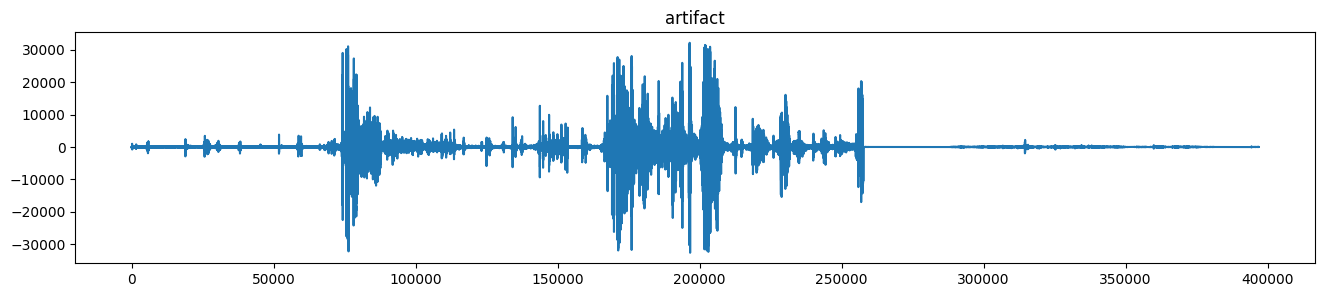

In [22]:
for path in artifact:
    try:
        rate,signal=wavfile.read(path)
    except:
        pass
plt.figure(figsize=(16, 3))
plt.plot(signal, '-', );
plt.title("artifact")


Text(0.5, 1.0, 'extrahls')

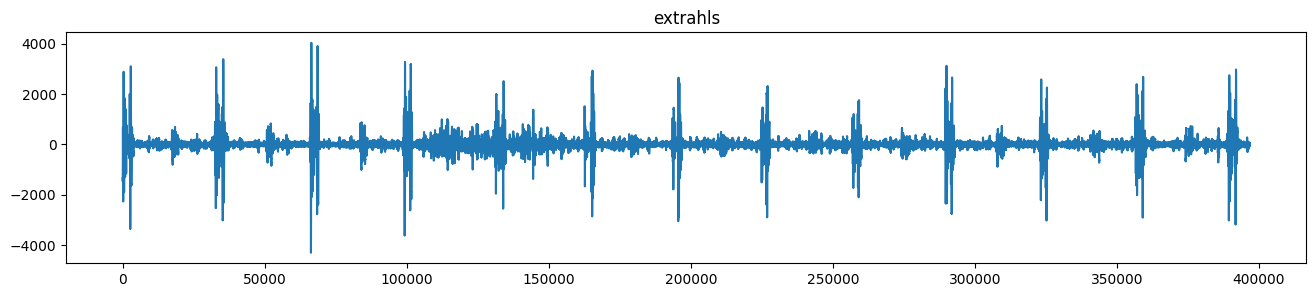

In [24]:
for path in extrahls:
    try:
        rate,signal=wavfile.read(path)
    except:
        pass
plt.figure(figsize=(16, 3))
plt.plot(signal, '-', );
plt.title("extrahls")

Text(0.5, 1.0, 'extrastole')

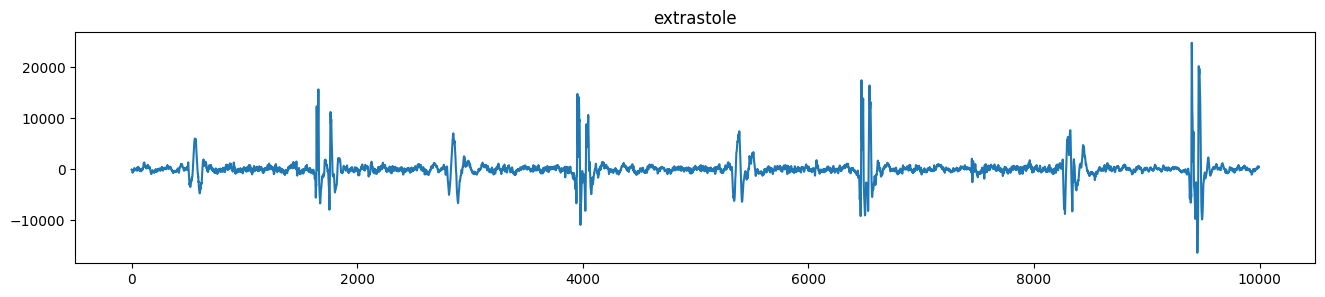

In [25]:
for path in extrastole:
    try:
        rate,signal=wavfile.read(path)
    except:
        pass
plt.figure(figsize=(16, 3))
plt.plot(signal, '-', );
plt.title("extrastole")

In [194]:
#.Create MFCC spectogram and plt the spectogram

# let Us draw first few spectogram per each classes

In [27]:
classes=list(np.unique(train_df['Labels']))

In [28]:
classes

['artifact', 'extrahls', 'extrastole', 'murmur', 'normal']

In [137]:
label_to_int= {y:x for x,y in enumerate(classes)}

In [136]:
label_to_int 

{'artifact': 0, 'extrahls': 1, 'extrastole': 2, 'murmur': 3, 'normal': 4}

In [114]:
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{0: 'artifact', 1: 'extrahls', 2: 'extrastole', 3: 'murmur', 4: 'normal'}


In [32]:
def plt_spect(mfccs):
    plt.figure(figsize=(12, 3))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.tight_layout()

In [33]:
# Here's a sample generate mfccs from a wave file
def mfcc(path):
    y, sr = librosa.load(path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfccs
    

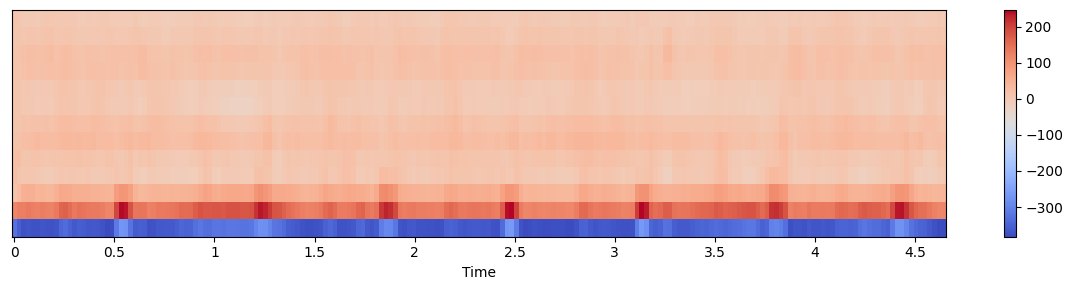

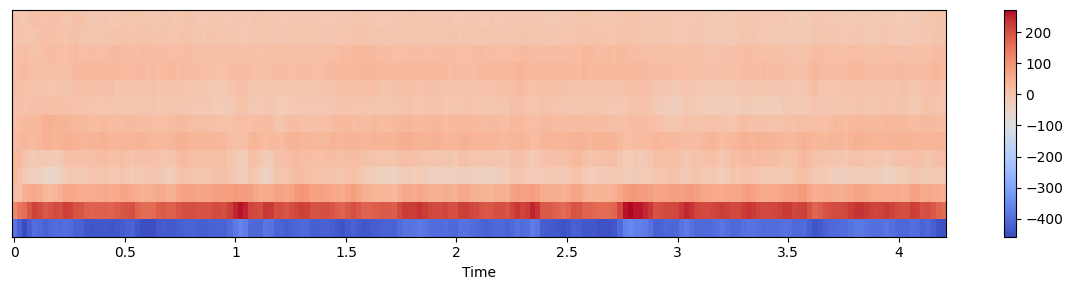

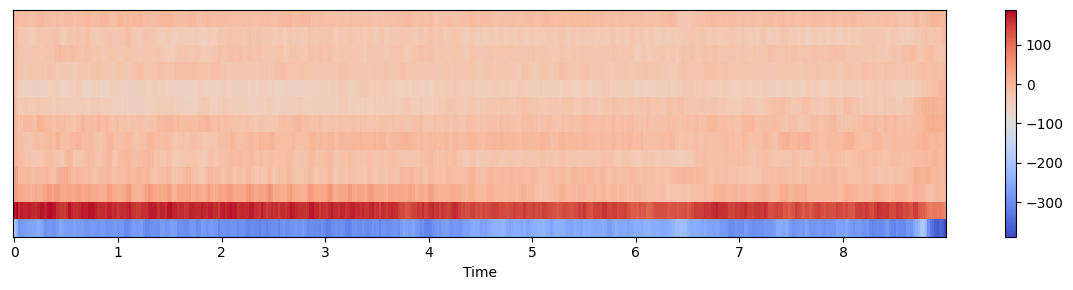

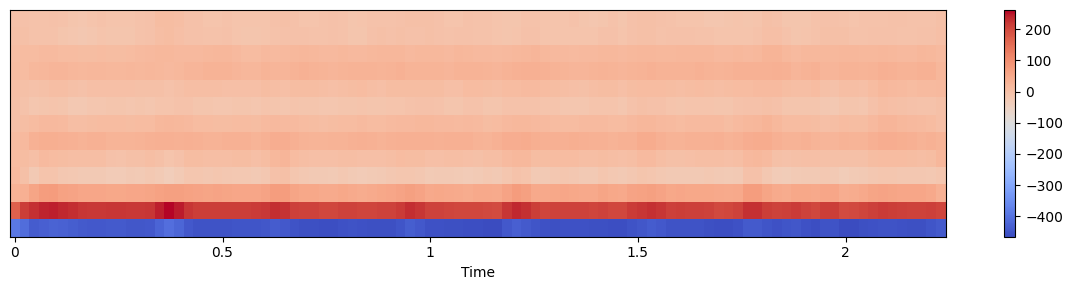

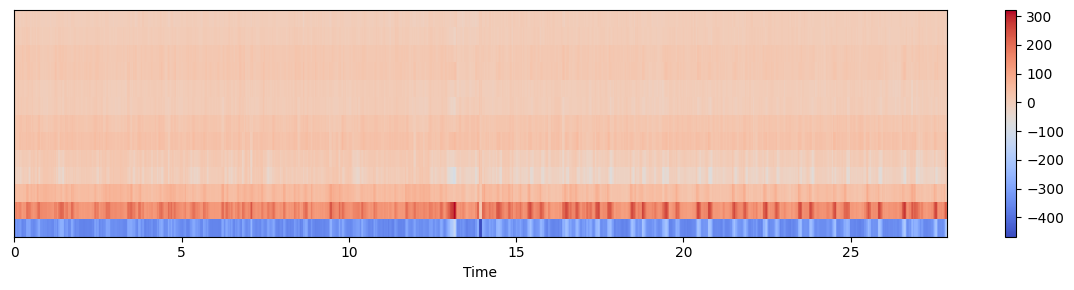

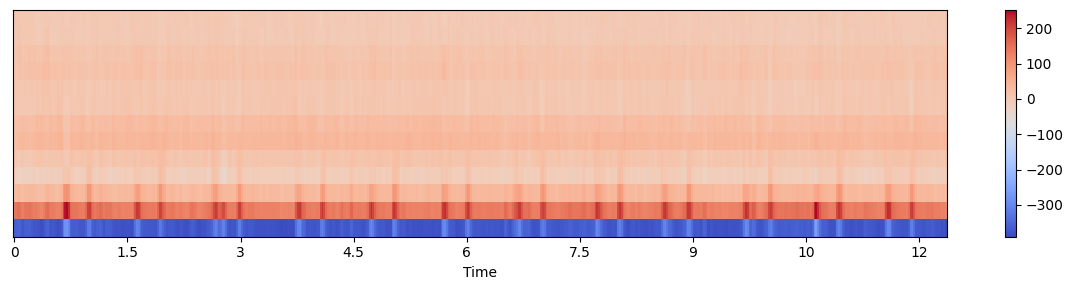

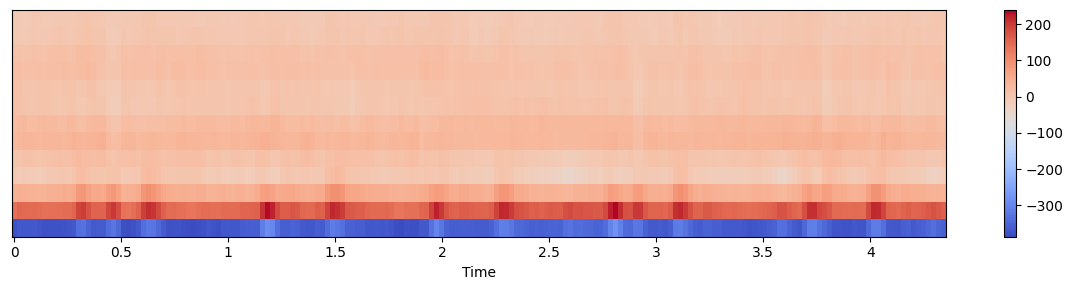

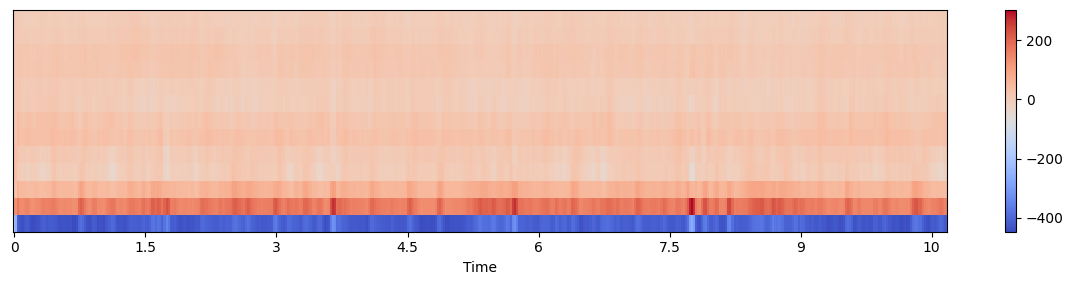

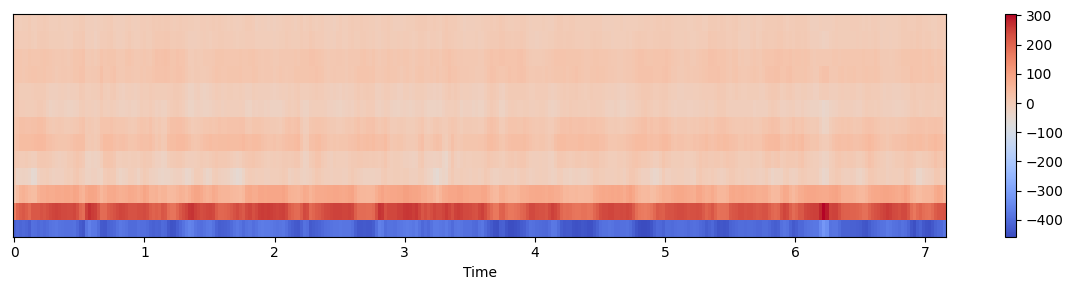

In [216]:
for i,p in enumerate(train_df['path'][0:9]):
    try:
        path=p
        mfc=mfcc(path)
        plt_spect(mfc)
        
        plt.savfig('mel_spect.png')
    except:
        pass
    

In [497]:
# Create a dataset for training and testing purpose

In [39]:
def load_file(file_path, target_length=66000, sr=22050):
    data = []
   
    for path in file_path:
        file_name = os.path.basename(path)
        base_dir = os.path.dirname(path)
        full_path = os.path.join(base_dir, file_name)
        try:
            X, _ = librosa.load(full_path, sr=sr)
            
        # Pad or truncate the audio signal to ensure consistent length
            if len(X) < target_length:
                X = np.pad(X, (0, target_length - len(X)), mode='constant')
            elif len(X) > target_length:
                X = X[:target_length]
            
            # Extract normalized MFCC feature from data
                mfccs = librosa.feature.mfcc(y=X, sr=sr, n_mfcc=13)
            
            # Ensure the feature array has the expected shape
                feature = np.array(mfccs).reshape(mfccs.shape[0], -1)
                data.append(feature)
        except Exception as e:
            pass  
        

    return data        

In [84]:
normal_snd=load_file(normal)
normal_labels = [0 for items in normal_snd]

In [85]:
len(normal_snd)

256

In [ ]:
normal_snd

In [86]:
artifact_snd=load_file(artifact)
artifact_labels = [1 for items in artifact_snd]

In [87]:
len(artifact_snd)

40

In [88]:
murmur_snd=load_file(murmur)
murmur_labels = [2 for items in murmur_snd]

In [89]:
len(murmur_snd)

114

In [90]:
extrastole_snd=load_file(extrastole)
extrastole_labels = [3 for items in extrastole_snd]

In [92]:
len(extrastole_snd)

37

In [93]:
extrahls_snd=load_file(extrahls)
extrahls_labels = [4 for items in extrahls_snd]

In [94]:
len(extrahls_snd)

16

In [245]:
x_data=np.concatenate((normal_snd,artifact_snd,murmur_snd,extrastole_snd,extrahls_snd))
y_data=np.concatenate((normal_labels,artifact_labels,murmur_labels,extrastole_labels,extrahls_labels))

In [97]:
len(test_df)

247

In [246]:
A_unlabelledtest_path=test_df[test_df['Labels']=='Aunlabelledtest']['path']
A_unlabelledtest_snd=load_file(A_unlabelledtest_path)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_snd]
B_unlabelledtest_path=test_df[test_df['Labels']=='Bunlabelledtest']['path']
B_unlabelledtest_snd=load_file(B_unlabelledtest_path)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_snd]

In [247]:
test_x = np.concatenate((A_unlabelledtest_snd,B_unlabelledtest_snd))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))


In [248]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, random_state=101, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state=101, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, len(classes)))
y_test = np.array(keras.utils.to_categorical(y_test, len(classes)))
y_val = np.array(keras.utils.to_categorical(y_val, len(classes)))
test_y=np.array(keras.utils.to_categorical(test_y, len(classes)))

In [237]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(13,129,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='sigmoid'))

In [234]:
model.compile('Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 129, 64)        │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,549 (127.14 KB)

 Trainable params: 32,549 (127.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training
history=model.fit(x_train, y_train,
                  epochs=20,
                  verbose=1,
                  validation_data=(x_val, y_val))

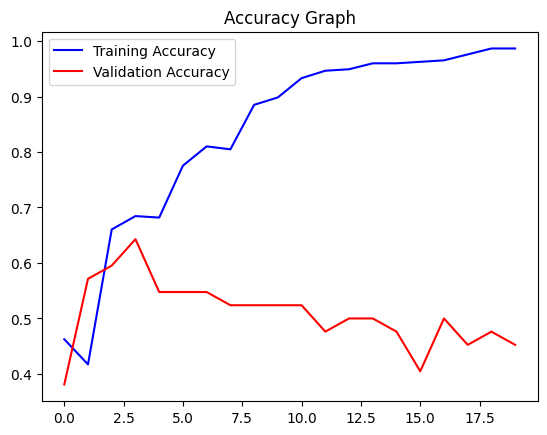

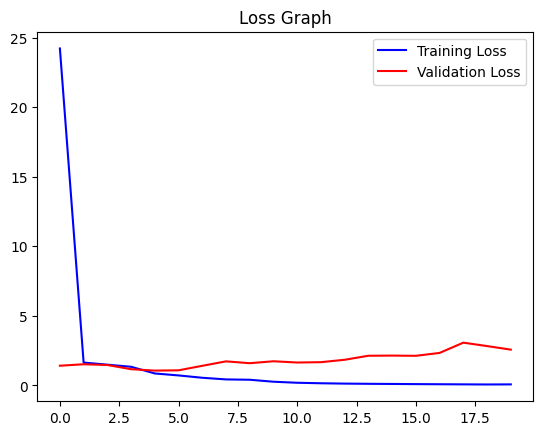

In [238]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [181]:
model.save('audio_class.h5')

In [243]:
model=load_model('audio_class.h5')
model.compile('Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [249]:
y_pred=model.predict(x_test)
prediction=np.argmax(y_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [257]:
prediction=np.argmax(y_pred, axis=1)

In [253]:
prediction

array([0, 0, 2, 0, 2, 0, 1, 1, 0, 4, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 3, 0, 0,
       2, 0, 1], dtype=int64)

In [255]:
y_test=np.argmax(y_test, axis=1)

In [256]:
# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, prediction, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, prediction, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, prediction, average='weighted')
print("F1-score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5531914893617021
Precision: 0.5004585473220836
Recall: 0.5531914893617021
F1-score: 0.5024004364429896
Confusion Matrix:
 [[17  2  2  1  0]
 [ 0  5  0  0  0]
 [ 9  0  3  0  0]
 [ 3  0  2  0  0]
 [ 0  1  1  0  1]]
